In [35]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import subprocess as sp
import glob
import astropy.io.fits as pyfits
from astropy.io import ascii
import astropy.cosmology as cm
from astropy import units as u
import csv
cosmo = cm.Planck15 
import numpy.mask as ma


SyntaxError: invalid syntax (<ipython-input-35-ef7563023c7e>, line 13)

# Getting remaining objects catalog

In [2]:
zeropoints = {"F435W":25.665,"F606W":26.493,"F814W":25.97,"F105W":26.2687,"F125W":26.2303,"F140W":24.4524,\
              "F160W":25.9463, "F625W":24.85714771, "F775W":25.66195995, "F850LP":25.89943399}


elgordo_subtracted_files = {'F606W': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF606W.fits', \
              'F625W': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF625W.fits', \
              'F775W': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF775W.fits', \
              'F814W': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF814W.fits', \
              'F850LP': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF850LP.fits',\
              'F105W': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF105W.fits',\
              'F125W': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF125W.fits',\
              'F140W': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF140W.fits',\
              'F160W': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF160W.fits',
              'F435W': '/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF435W.fits'}



thresh_test = 2.0 #3.0

for filter,image in elgordo_subtracted_files.items():
    #if not filter == 'F125W':
    #    continue
    print('processing this image',image)
    ! sex {image} -DETECT_THRESH {thresh_test} -CATALOG_NAME /data1/rowland/LensedCatalogs/remaining_objects_{filter}.cat -PARAMETERS_NAME default.param -PIXEL_SCALE 0.06 -MAG_ZEROPOINT {zeropoints[filter]} -ANALYSIS_THRESH {thresh_test} -DETECT_THRESH {thresh_test} -CHECKIMAGE_TYPE NONE


processing this image /data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF606W.fits
/bin/sh: sex: command not found
processing this image /data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF625W.fits
/bin/sh: sex: command not found
processing this image /data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF775W.fits
/bin/sh: sex: command not found
processing this image /data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF814W.fits
/bin/sh: sex: command not found
processing this image /data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF850LP.fits
/bin/sh: sex: command not found
processing this image /data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordoF105W.fits
/bin/sh: sex: command not found
processing this image /data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar

In [7]:
#('/data1/rowland/FINALimages/galstarsky_subtracted/modelsWOskyNstar_subtubtracted_elgordo{}.fits').format(filter)


testdata = ascii.read('/data/rowland/LensedCatalogs/remaining_objects_F105W.cat')
testdata

NUMBER,MAG_AUTO,MAGERR_AUTO,KRON_RADIUS,ISOAREA_IMAGE,XPEAK_IMAGE,YPEAK_IMAGE,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,A_IMAGE,THETA_IMAGE,MU_MAX,ELLIPTICITY,CLASS_STAR,FLUX_RADIUS
,mag,mag,,pix2,pix,pix,pix,pix,deg,deg,pix,deg,mag / arcsec2,,,pix
int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,18.2115,0.0003,3.5,10394,1667,842,1667.4456,842.0095,0.0,0.0,20.063,40.09,17.5056,0.514,0.976,10.425
2,28.2163,0.2112,7.6,3,2069,169,2069.3186,168.6685,0.0,0.0,0.57,45.62,24.6394,0.408,0.359,1.491
3,28.202,0.1966,6.69,4,2035,176,2035.0116,176.4919,0.0,0.0,0.793,-32.24,24.4826,0.603,0.367,1.404
4,28.4223,0.2331,7.23,3,2112,184,2112.6499,184.3146,0.0,0.0,0.576,43.46,24.5109,0.421,0.351,1.292
5,28.3267,0.1654,4.07,5,2093,193,2093.2249,192.4266,0.0,0.0,0.73,18.95,24.1843,0.371,0.435,1.138
6,27.4044,0.108,3.5,15,2128,211,2126.7473,210.5854,0.0,0.0,1.224,-12.8,24.1666,0.248,0.347,1.901
7,27.6278,0.1103,3.5,10,2087,198,2087.4797,198.5206,0.0,0.0,1.019,74.17,24.3573,0.287,0.384,1.671
8,27.6704,0.0976,3.5,8,2110,196,2110.1135,196.1234,0.0,0.0,0.849,-41.92,23.9265,0.231,0.506,1.383


# Studying Cluster galaxies

### converting pix to radius (kpc) for study


###### getting best outputs first, then pulling radius

In [11]:
#use radius from best output
masterdata_wkabooms = ascii.read('/Volumes/PURPLEDRIVE/mastertable_wkabooms') #on laptop
#masterdata_wkabooms
masterdata = ascii.read('/Volumes/PURPLEDRIVE/mastertable')
#masterdata

In [5]:
#matching outputs from firstrun & rerun via index for ALL FILTERS (cycle)


tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]
filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]


allreruns = []
for tfilter in tfilters:
    total=[]
    reruns =[]
    s=0
    #print('using this now',tfilter)
    for value in masterdata_wkabooms['{}_kabooms'.format(tfilter)]:
        #print('using this now',tfilter)

        if value == 0.0 or value==1.0:
            total.append(value) #total number of galfit runs
            s+=1
    #print('total',np.shape(total))
    for count,val in enumerate(total):
        #print(val)
        if val == 1.0: #kabooms
            count=count
            #print('chose this count',count,val)
            reruns.append(count)
        else:
            count=-99
            #print('chose that',count,val)
            reruns.append(count)
    allreruns.append(reruns)
            #print('starting new cycle')
    #break

allnewreruns=[]
for k in range(len(tfilters)):
    a=-1
    newreruns=[]
    for j in allreruns[k]:
        if j!= -99:
            a+=1
            j=a
            newreruns.append(j)
        else:
            j=j
            newreruns.append(j)
    allnewreruns.append(newreruns)
#print(np.shape(allnewreruns),np.shape(allnewreruns[4]),allreruns[4])#enumerate this to get matches btwn firstrun & rerun

In [6]:
filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

allbestoutputs={} #[]
for h,filter in enumerate(filters):
    bestoutputs = []
    for count,file in enumerate(allnewreruns[h]):
        #print(filter)
        if file == -99:
            best = '/Volumes/PURPLEDRIVE/{}/Outputs/output{}.fits'.format(filter,count)
            bestoutputs.append(best)
            #print(count,file)
        else: 
            best = '/Volumes/PURPLEDRIVE/{}/Outputs/KaboomRerun/output{}_2ndrun.fits'.format(filter,file)
            bestoutputs.append(best)
        allbestoutputs[filter]= bestoutputs

###### pulling radius

In [18]:
modelrads = {}
for filter in filters:
    outputlist = allbestoutputs[filter]
    modelrads[filter]=np.zeros_like(outputlist)
    rads=[]
    for file in outputlist:
        header=pyfits.open(file)[2].header
        radius = header['1_RE'].split('+')[0]
        if '*' == radius[0]:
            print('bad fit for:',radius,filter,file)
            radius = 0
        else:
            radius = radius
        rads.append(float(radius))
    modelrads[filter] = rads
for filter in filters:
    print(len(modelrads[filter]))


bad fit for: *2.065e-03*  F435W /Volumes/PURPLEDRIVE/F435W/Outputs/KaboomRerun/output2_2ndrun.fits
bad fit for: *0.0169*  F606W /Volumes/PURPLEDRIVE/F606W/Outputs/KaboomRerun/output4_2ndrun.fits
bad fit for: *1.000e-02*  F625W /Volumes/PURPLEDRIVE/F625W/Outputs/KaboomRerun/output22_2ndrun.fits
bad fit for: *0.1471*  F775W /Volumes/PURPLEDRIVE/F775W/Outputs/KaboomRerun/output2_2ndrun.fits
53
53
53
53
8
84
75
76
53
75


###### need to match bestoutput (masked array) with its z 

In [64]:


tfilters = ["F105","F125","F140","F160","F435","F606","F625","F775","F814","F850"]
filters = ["F105W","F125W","F140W","F160W","F435W","F606W","F625W","F775W","F814W","F850LP"]

total={}
allreruns = []
for tfilter in tfilters:
    reruns =[]
    s=0
    #print('using this now',tfilter)
    for count,value in enumerate(masterdata_wkabooms['{}_kabooms'.format(tfilter)]):
        #print('using this now',tfilter)
        #print(value,filter)
        total[tfilter]=np.zeros_like(masterdata_wkabooms['{}_kabooms'.format(tfilter)])
        if value == 0.0 or value==1.0:
            #total.append(value) #total number of galfit runs
            s+=1
            count=count
            reruns.append(count)
            #total[filter] += reruns
        else:
            count=-99
            reruns.append(count)
    total[tfilter] +=reruns
    #print('total',np.shape(total))
#     for count,val in enumerate(total):
#         #print(val)
#         if val == 1.0: #kabooms
#             count=count
#             #print('chose this count',count,val)
#             reruns.append(count)
#         else:
#             count=-99
#             #print('chose that',count,val)
#             reruns.append(count)
    allreruns.append(reruns)

In [59]:
for tfilter in tfilters:
    print(np.shape(total[tfilter]))
# for count,arr in enumerate(allreruns):
#     print(count,np.shape(arr))

(89,)
(89,)
(89,)
(89,)
(89,)
(89,)
(89,)
(89,)
(89,)
(89,)


In [66]:
print(total['F105'])

F105_kabooms
------------
         0.0
         1.0
         2.0
         3.0
         4.0
       -99.0
         6.0
         7.0
         8.0
         9.0
         ...
       -99.0
        79.0
       -99.0
       -99.0
       -99.0
       -99.0
       -99.0
       -99.0
       -99.0
       -99.0
       -99.0
Length = 89 rows


In [61]:
#getting redshift values
redshift=[]
for z in masterdata['z']:
    zs = cosmo.kpc_proper_per_arcmin(z).to('kpc/arcsec') #* (60*u.arcmin)
    redshift.append(zs.value)

In [76]:
#still matching detection to z

distance_kpc ={}
rads={}
for tfilter in tfilters:
    count=0
    if tfilter is not 'F850':
        filter = tfilter + 'W'
    else:
        filter = tfilter + 'LP'
    mask = total[tfilter]
    radius = modelrads[filter]
    rads_pix=[]
    radii=[]
    rads[filter]=np.zeros_like(mask)
    #print(tfilter)
    for val in mask:
        if val != -99.0:
            #print(count,val)
            rad = radius[count]
            count+=1
            
        else:
            rad = -99
        radii.append(rad)
    rads[filter] +=radii

print(rads)    
        
      

{'F105W': <MaskedColumn name='F105_kabooms' dtype='float64' length=89>
14.8283
    1.0
 2.9785
 2.3478
15.8664
  -99.0
    1.0
  4.652
  3.518
 4.9736
 2.6632
 3.4515
    ...
  -99.0
  -99.0
 7.6487
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0, 'F125W': <MaskedColumn name='F125_kabooms' dtype='float64' length=89>
16.7418
 4.9245
 3.4098
 3.2248
41.2698
  -99.0
 2.2129
18.6012
 4.7468
 4.4513
 4.0164
 3.0843
    ...
  -99.0
  -99.0
 3.3892
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0, 'F140W': <MaskedColumn name='F140_kabooms' dtype='float64' length=89>
17.6904
 2.9774
 3.6754
 3.1721
49.1741
  -99.0
 3.4905
 5.2486
 4.7343
 4.5618
  4.926
  2.989
    ...
  -99.0
  -99.0
23.8212
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0
  -99.0, 'F160W': <MaskedColumn name='F160_kabooms' dtype='float64' length=89>
17.2324
 2.0878
 4.1195
 2.9324
61.9316
  -99.0
 2.8274
 4.7252
 3.9062
   4.16
 4.0275
 2.7778
    ...
  -99.0
  -9

###### doing conversions with new 'best' radii

# left off here, have zmatched masked array of radii now so need to do the math with those two to get distance conversion

In [ ]:
tfilters = ['F105','F125','F140','F160','F435','F606','F625','F775','F814','F850','F435'] 

rads = {}
distance_kpc = {}

for filter in tfilters:
    rads[filter] = np.zeros((1,89))
    distance_kpc[filter] = np.zeros((1,89))

    pixscale = 0.06
    factor = np.pi/(180 * 3600)
    rads_pix=[]
    dist=[]

        distance = cosmo.kpc_proper_per_arcmin(z) * (60*u.arcmin)
        dist.append(float(distance.value))
    distance_kpc[filter] += dist
    rads[filter] += rads_pix
    
for filter in tfilters:
    rads = modelrads[filter]
    z = zs
    

In [ ]:
rads_kpc={}
for filter in tfilters:
    pixscale = 0.06 
    factor = np.pi/(180 * 3600)
    rads_kpc[filter] = np.zeros((1,89))
    for val in range(89):
        radius_kpc = rads[filter] * pixscale * distance_kpc[filter][0][val] * factor
    rads_kpc[filter] +=radius_kpc

# old attempt

In [1]:
# DONT USE RADIUS FROM HERE
# masterdata = ascii.read('/run/media/rowland/PURPLEDRIVE/mastertable')
# masterdata_wkabooms = ascii.read('/run/media/rowland/PURPLEDRIVE/mastertable_wkabooms')

# masterdata_wkabooms

In [5]:
cosmo = cm.Planck15 
cosmo.kpc_proper_per_arcmin(0.87)/60 #kpc/arcmin

<Quantity 7.932537 kpc / arcmin>

In [125]:
for z in masterdata['z']:
    zs = cosmo.kpc_proper_per_arcmin(z).to('kpc/arcsec') #* (60*u.arcmin)
    print(zs)

7.932918470472427 kpc / arcsec
7.929534904863792 kpc / arcsec
7.94081624359278 kpc / arcsec
7.943030956841581 kpc / arcsec
7.945240946643955 kpc / arcsec
7.918186606540252 kpc / arcsec
7.917163988879457 kpc / arcsec
7.949861224950226 kpc / arcsec
7.9544341457306045 kpc / arcsec
7.956300223064183 kpc / arcsec
7.905095571082911 kpc / arcsec
7.960791431155973 kpc / arcsec
7.896871126069999 kpc / arcsec
7.892098984737138 kpc / arcsec
7.972470463651165 kpc / arcsec
7.935693566580793 kpc / arcsec
7.935720737003527 kpc / arcsec
7.940978456117377 kpc / arcsec
7.941032521330279 kpc / arcsec
7.9411406433138305 kpc / arcsec
7.9452140239677265 kpc / arcsec
7.94556396406081 kpc / arcsec
7.917136336961474 kpc / arcsec
7.948600763000842 kpc / arcsec
7.9487885892750265 kpc / arcsec
7.912452863936331 kpc / arcsec
7.956220318249429 kpc / arcsec
7.906241476857006 kpc / arcsec
7.901678615336057 kpc / arcsec
7.888697840506929 kpc / arcsec
7.933490415283195 kpc / arcsec
7.934062048081393 kpc / arcsec
7.9351

In [113]:
tfilters = ['F105','F125','F140','F160','F435','F606','F625','F775','F814','F850','F435'] 

rads = {}
distance_kpc = {}

for filter in tfilters:
    rads[filter] = np.zeros((1,89))
    distance_kpc[filter] = np.zeros((1,89))

    pixscale = 0.06
    factor = np.pi/(180 * 3600)
    rads_pix=[]
    dist=[]
    for row in masterdata:
        z = row['z']
        radius_pix = row['FLUX_RADIUS_{}'.format(filter)]
        rads_pix.append(radius_pix)
        distance = cosmo.kpc_proper_per_arcmin(z) * (60*u.arcmin)
        dist.append(float(distance.value))
    distance_kpc[filter] += dist
    rads[filter] += rads_pix



/software/local/lib64/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Warning: converting a masked element to nan.


In [114]:
#print((distance_kpc['F105'][0][1]))
print(distance_kpc[filter])

[[28558.5064937  28546.32565751 28586.93847693 28594.91144463
  28602.86740792 28505.47178354 28501.79035997 28619.50040982
  28635.96292463 28642.68080303 28458.3440559  28658.84915216
  28428.73605385 28411.55634505 28700.89366914 28568.49683969
  28568.59465321 28587.52244202 28587.71707679 28588.10631593
  28602.77048628 28604.03027062 28501.69081306 28614.9627468
  28615.63892139 28484.83031017 28642.3931457  28462.46931669
  28446.04301521 28399.31222582 28560.56549502 28562.62337309
  28566.54003519 28569.08368268 28538.93915925 28573.09132728
  28529.7599124  28580.89882917 28582.06855377 28599.37663811
  28490.22571008 28489.9261634  28631.63780221 28475.11962241
  28634.71396652 28445.63904588 28431.57517322 28423.15323923
  28406.45922847 28746.18168647 28749.90655639 28568.59465321
  28536.76972421 28536.57244142 28578.75338544 28523.23216111
  28598.11527777 28501.88990429 28608.19421118 28620.75452667
  28621.9117957  28473.31495779 28462.26818583 28455.72577175
  28670.3

In [122]:
rads_kpc={}
for filter in tfilters:
    pixscale = 0.06 
    factor = np.pi/(180 * 3600)
    rads_kpc[filter] = np.zeros((1,89))
    for val in range(89):
        radius_kpc = rads[filter] * pixscale * distance_kpc[filter][0][val] * factor
    rads_kpc[filter] +=radius_kpc

In [123]:
#print(rads_kpc) #wait why are these so small?

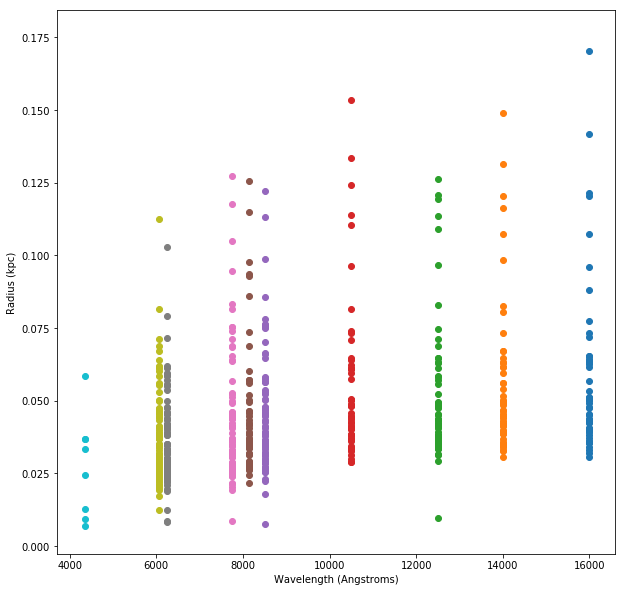

In [124]:
#f,axes = plt.figure(figsize=(10,10))
filters = ["F160W","F140W","F125W","F105W","F850LP","F814W","F775W","F625W","F606W","F435W"]#in wl order

# for idx, filter in enumerate(tfilters):
    
#     wl = np.repeat(idx,len(rads_kpc[filter][0]))
#     print(filter,np.shape(wl),np.shape(rads_kpc[filter]),np.shape(rads_kpc[filter][0]))
plt.figure(figsize=(10,10))
plt.scatter(np.repeat(16000,len(rads_kpc["F160"][0])),rads_kpc["F160"][0])
plt.scatter(np.repeat(14000,len(rads_kpc["F140"][0])),rads_kpc["F140"][0])
plt.scatter(np.repeat(12500,len(rads_kpc["F125"][0])),rads_kpc["F125"][0])
plt.scatter(np.repeat(10500,len(rads_kpc["F105"][0])),rads_kpc["F105"][0])
plt.scatter(np.repeat(8500,len(rads_kpc["F850"][0])),rads_kpc["F850"][0])
plt.scatter(np.repeat(8140,len(rads_kpc["F814"][0])),rads_kpc["F814"][0])
plt.scatter(np.repeat(7750,len(rads_kpc["F775"][0])),rads_kpc["F775"][0])
plt.scatter(np.repeat(6250,len(rads_kpc["F625"][0])),rads_kpc["F625"][0])
plt.scatter(np.repeat(6060,len(rads_kpc["F606"][0])),rads_kpc["F606"][0])
plt.scatter(np.repeat(4350,len(rads_kpc["F435"][0])),rads_kpc["F435"][0])
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Radius (kpc)')
#plt.ylim(0,0.015)
plt.savefig('cluster_galaxies_size_by_wl')

In [12]:
for i in range(5):
    print(i)
    for j in np.arange(10,15,1):
        print(j)

0
10
11
12
13
14
1
10
11
12
13
14
2
10
11
12
13
14
3
10
11
12
13
14
4
10
11
12
13
14
